In [1]:
from pyiron_contrib.workflow import nodes
from pyiron_contrib.workflow.workflow import Workflow

The job my_MD_run was saved and received the ID: 296


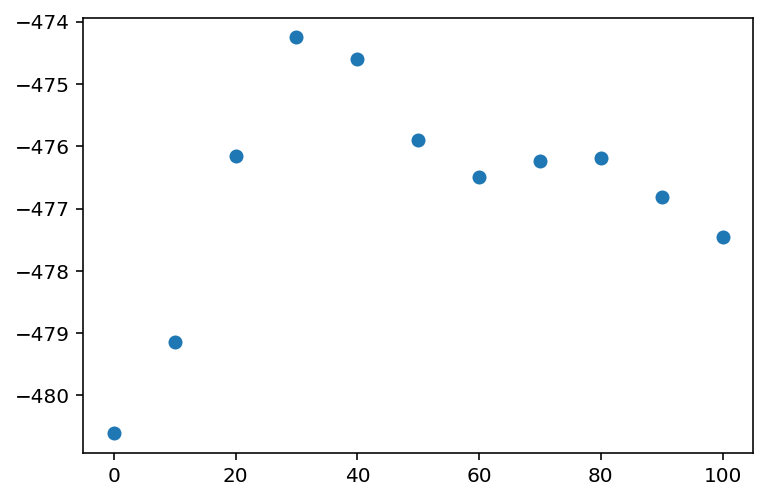

In [2]:
wf = Workflow("my_wf")

wf.structure = nodes.BulkStructure(
    element='Ni', 
    cubic=True, 
    repeat=3
)

wf.engine = nodes.Lammps(
    structure=wf.structure.output.structure
)

wf.calc_md = nodes.CalcMD(
    temperature=300,
    n_ionic_steps=100,
    n_print=10,
    job_name="my_MD_run",
    job=wf.engine.output.job,
)

wf.plot = nodes.Plot(
    x=wf.calc_md.output.steps,
    y=wf.calc_md.output.energy_pot
)

wf.update()